In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sb

from matplotlib import pyplot as plt 
import matplotlib

import pickle

from steves_utils.utils_v2 import get_datasets_base_path

from steves_utils.transforms import (get_average_magnitude, get_average_power)

In [2]:
domain=8 # The domain we're gonna check out

pickle_path = "oracle.Run1_framed_2000Examples_stratified_ds.2022A.pkl"

with open(os.path.join(get_datasets_base_path(), pickle_path), "rb") as f:
    p = pickle.load(f)

In [3]:
from steves_utils.ORACLE.utils_v2 import (
    ALL_DISTANCES_FEET_NARROWED,
    ALL_RUNS,
    ALL_SERIAL_NUMBERS,
    SERIAL_NUMBER_MAPPING,
    serial_number_to_id
)

data = []


for u in sorted(p["data"].keys()):
#     magnitude_by_domain_by_label[u] = {y:[] for y in p["data"][u].keys()}
#     power_by_domain_by_label = {y:[] for y in p["data"][u].keys()}
    
    for y,X in p["data"][u].items():
        for x in X:
#             magnitude_by_domain_by_label[u][y] = 0
#             power_by_domain_by_label
            data.append(
                {
                    "u":u,
                    "y": serial_number_to_id(y),
                    "power": get_average_power(x),
                    "magnitude": get_average_magnitude(x)
                }
            )

    
            

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,u,y,power,magnitude
0,8,0,0.000078,0.008451
1,8,0,0.000074,0.008370
2,8,0,0.000080,0.008523
3,8,0,0.000074,0.008372
4,8,0,0.000075,0.008380
...,...,...,...,...
255995,50,15,0.000004,0.001891
255996,50,15,0.000004,0.001859
255997,50,15,0.000004,0.001891
255998,50,15,0.000004,0.001908


In [6]:
df2 = df.groupby(["u","y"])[["power", "magnitude"]].mean()
power = df2.reset_index().pivot(columns='u',index='y',values='power')
magnitude = df2.reset_index().pivot(columns='u',index='y',values='magnitude')


In [7]:
power

u,8,14,20,26,32,38,44,50
y,,,,,,,,
0,0.000077,0.000019,0.000026,0.000013,0.000005,0.000003,0.000005,0.000007
1,0.000047,0.000028,0.000031,0.000011,0.000006,0.000007,0.000004,0.000005
2,0.000028,0.000020,0.000033,0.000014,0.000006,0.000003,0.000004,0.000008
3,0.000023,0.000018,0.000030,0.000016,0.000007,0.000002,0.000006,0.000004
4,0.000052,0.000023,0.000034,0.000018,0.000006,0.000003,0.000004,0.000003
5,0.000044,0.000021,0.000031,0.000011,0.000005,0.000004,0.000004,0.000004
6,0.000047,0.000017,0.000032,0.000012,0.000012,0.000006,0.000003,0.000004
7,0.000045,0.000019,0.000032,0.000015,0.000005,0.000003,0.000003,0.000003
8,0.000051,0.000021,0.000029,0.000015,0.000005,0.000004,0.000004,0.000006


In [8]:
magnitude

u,8,14,20,26,32,38,44,50
y,,,,,,,,
0,0.008468,0.004261,0.004917,0.003485,0.002160,0.001537,0.002108,0.002564
1,0.006565,0.005127,0.005403,0.003215,0.002342,0.002454,0.002013,0.002237
2,0.005081,0.004330,0.005575,0.003660,0.002373,0.001753,0.001948,0.002639
3,0.004659,0.004082,0.005293,0.003859,0.002467,0.001258,0.002328,0.001926
4,0.006932,0.004656,0.005631,0.004145,0.002426,0.001559,0.001802,0.001694
5,0.006350,0.004376,0.005336,0.003260,0.002079,0.001939,0.001849,0.001825
6,0.006604,0.003994,0.005506,0.003279,0.003301,0.002456,0.001612,0.001891
7,0.006485,0.004165,0.005494,0.003750,0.002120,0.001739,0.001763,0.001695
8,0.006894,0.004371,0.005189,0.003707,0.002191,0.001916,0.002015,0.002285


<AxesSubplot:title={'center':'CORES Magnitude by Domain'}, xlabel='u', ylabel='y'>

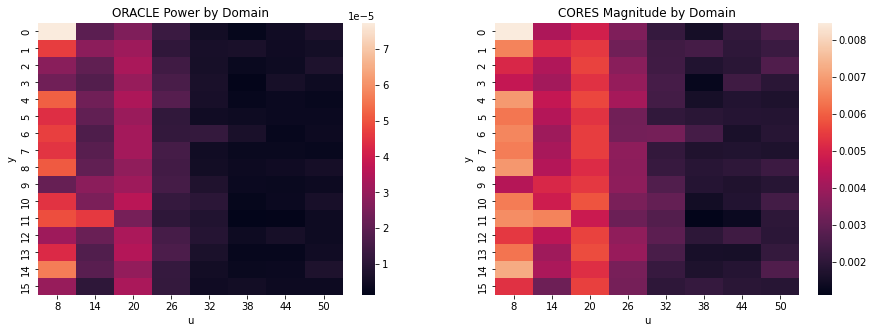

In [9]:
plt.figure(figsize=(15,5))
power_ax = plt.subplot(1,2,1)
magn_ax  = plt.subplot(1,2,2)

power_ax.set_title("ORACLE Power by Domain")
magn_ax.set_title("CORES Magnitude by Domain")


sb.heatmap(power, ax = power_ax)
sb.heatmap(magnitude, ax = magn_ax)

Text(0, 0.5, 'Power')

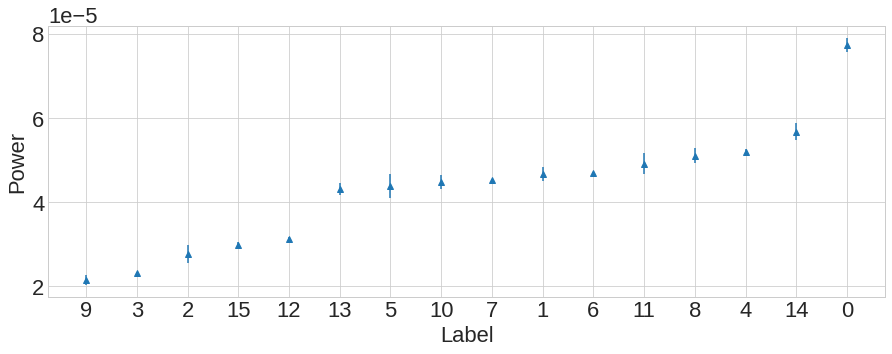

In [10]:
matplotlib.rcParams.update({'font.size': 22})
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,5))


df2 = df.groupby(["u","y"])[["power", "magnitude"]].std()
power_std = df2.reset_index().pivot(columns='u',index='y',values='power')
magnitude_std = df2.reset_index().pivot(columns='u',index='y',values='magnitude')

domain=8
S = power[domain].sort_values()
x = [str(a) for a in S.index]
y = S
e = power_std[domain][S.index]

plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.xlabel("Label")
plt.ylabel("Power")

Text(0, 0.5, 'Magnitude')

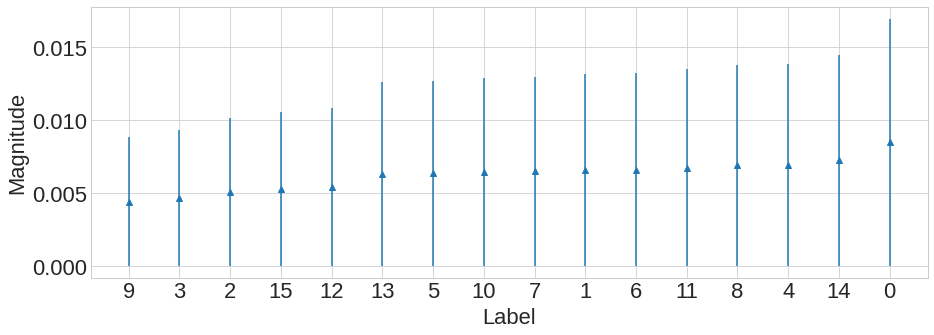

In [11]:
matplotlib.rcParams.update({'font.size': 22})
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,5))


df2 = df.groupby(["u","y"])[["power", "magnitude"]].std()
power_std = df2.reset_index().pivot(columns='u',index='y',values='power')
magnitude_std = df2.reset_index().pivot(columns='u',index='y',values='magnitude')

S = magnitude[domain].sort_values()
x = [str(a) for a in S.index]
y = S
e = magnitude[domain][S.index]

plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.xlabel("Label")
plt.ylabel("Magnitude")

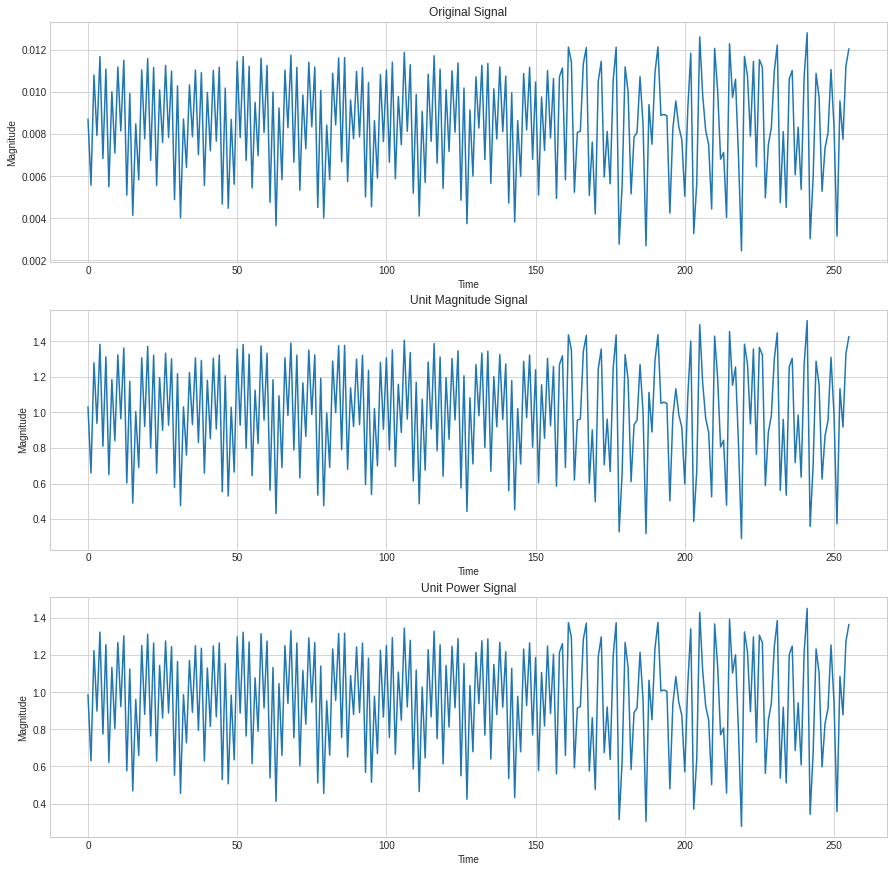

In [13]:
from steves_utils.transforms import (normalize_to_unit_magnitude, normalize_to_unit_power)

# Just grab any old sample
x = p["data"][domain]["3123D52"][0]

def complexify(i):
    return i[0] + 1j*i[1]

original = complexify(x)
mag = complexify(normalize_to_unit_magnitude(x))
power = complexify(normalize_to_unit_power(x))

matplotlib.rcParams.update({'font.size': 10})
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,15))

original_ax = plt.subplot(3,1,1)
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Original Signal")
mag_ax = plt.subplot(3,1,2)
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Unit Magnitude Signal")
power_ax = plt.subplot(3,1,3)
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Unit Power Signal")

original_ax.plot(range(len(original)),np.abs(original))
mag_ax.plot(range(len(mag)),np.abs(mag))
power_ax.plot(range(len(power)),np.abs(power))


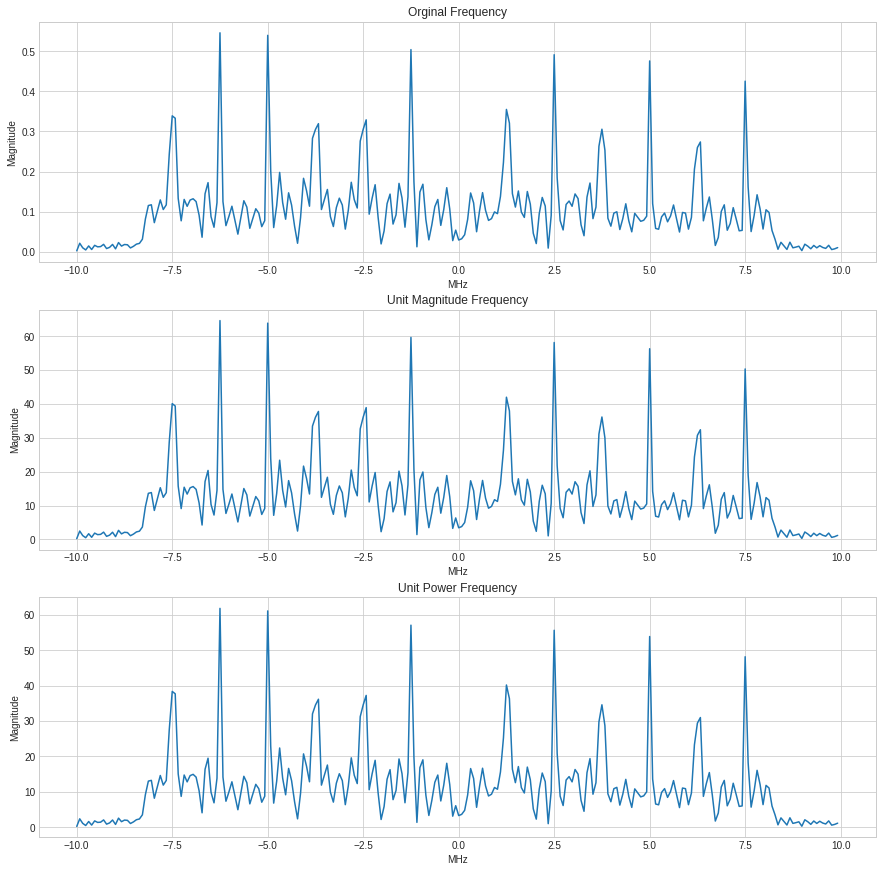

In [21]:
from scipy import signal

matplotlib.rcParams.update({'font.size': 10})
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,15))
original_ax = plt.subplot(3,1,1)
plt.xlabel("MHz")
plt.ylabel("Magnitude")
plt.title("Original Signal")
mag_ax = plt.subplot(3,1,2)
plt.xlabel("MHz")
plt.ylabel("Magnitude")
plt.title("Unit Magnitude Signal")
power_ax = plt.subplot(3,1,3)
plt.xlabel("MHz")
plt.ylabel("Magnitude")
plt.title("Unit Power Signal")


f = 20e6
signal_spectrum = np.fft.fftshift(np.fft.fft(original))
freqs = np.fft.fftshift(np.fft.fftfreq(len(original), d=1.0/f))
original_ax.set_title("Orginal Frequency")
original_ax.plot(freqs / 1e6, np.abs(signal_spectrum))  # in MHz

signal_spectrum = np.fft.fftshift(np.fft.fft(mag))
freqs = np.fft.fftshift(np.fft.fftfreq(len(mag), d=1.0/f))
mag_ax.set_title("Unit Magnitude Frequency")
mag_ax.plot(freqs / 1e6, np.abs(signal_spectrum))  # in MHz

signal_spectrum = np.fft.fftshift(np.fft.fft(power))
freqs = np.fft.fftshift(np.fft.fftfreq(len(power), d=1.0/f))
power_ax.set_title("Unit Power Frequency")
power_ax.plot(freqs / 1e6, np.abs(signal_spectrum))  # in MHz